# Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações adicionais

In [2]:
plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

# Carregando o banco de dados

In [3]:
banco = pd.read_csv("Training_Dataset_v2.csv", low_memory = False)

In [4]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

# Transformações nas variáveis

## Retirando a variável sku

In [5]:
banco = banco.drop("sku", axis = 1)

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## Lidando com os valores NaN

- Nenhum ganho absurdo de diferença inputando a média, mediana ou moda (a mesma nos dá score parecidos);
- O melhor ganho, foi dropando os NAs e utilizando a estratégia de colocar o 999 no lugar deles.
    - A variável lead_time teve uma maior importância (0.03466);
    - O **recall** (nos dá informações sobre falsos negativos, de todos os exemplos que realmente são verdadeiros, o quanto meu modelo meu modelo previu corretamente), métrica que queremos maximizar, teve o valor de 0.51

In [6]:
banco.isnull().sum()

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [7]:
#--- Para comentar as linhas: Ctrl + "/" (teclado numérico)

#--- Dropando todas


# banco = banco.dropna()

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando média na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].mean())

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando média na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].median())

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando a moda na variável lead_time

# banco = banco[: -1] 

# banco["lead_time"] = banco["lead_time"].fillna(banco["lead_time"].mode()[0])

#--------------------------------------------------------------------

#--- Excluindo a última linha e imputando o 0 na variável lead_time

banco = banco[: -1] 

banco["lead_time"] = banco["lead_time"].fillna(999)

banco.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,No,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,-1.0,999.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


## Recodificando variáveis qualitativas para quantitativas

In [8]:
columns_yesno = ["potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop", "went_on_backorder"]

banco[columns_yesno] = banco[columns_yesno].replace({"No" : 0, "Yes": 1})

banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


## Criando novas features

In [9]:
#--- national_inv quadrado (Boa variável)

banco["national_inv_poly2"] = banco["national_inv"] ** 2


#--- 0 se national_inv < 0, 1 se >= 0 (Variável ruim)

# banco["national_inv_qual"] = banco["national_inv"].map(lambda x: 0 if x < 0 else 1)


#--- Feature verificando se a lead_time (O tempo de trânsito do produto) é nulo ou não:

# banco["lead_time_isnull"] = banco["lead_time"].map(lambda x: 1 if x == 999 else 0)


# Resultado: é uma boa variável para aumentar o Recall em 0.02 (0.54), apesar de aumentar um pouco os falsos positivos


#--- Tentativa de retirar variáveis que não foram importantes para o primeiro modelo:

# banco = banco.drop(["potential_issue", "rev_stop", "oe_constraint"], axis = 1)

# Resultado: O modelo diminui em 0.01 o Recall, coisa que não queremos


#--- Criando uma média para cada variável de meses

# banco["forecast_month_avg"] = banco[["forecast_3_month", "forecast_6_month", "forecast_9_month"]].mean(axis = 1)

# banco["sales_month_avg"] = banco[["sales_1_month", "sales_3_month", "sales_6_month", "sales_9_month"]].mean(axis = 1)

# banco["perf_month_avg"] = banco[["perf_6_month_avg", "perf_12_month_avg"]].mean(axis = 1)


# Resultado: São boas variáveis para diminuir os falsos positivos, entretanto aumenta os falsos negativos


#--- Verificamos através da correlação que quanto maior o nível de estoque atual da peça, maior a quantidade mínima do produto 
# recomendada para ficar em estoque, podemos criar uma razão entre elas:


banco["new"] = banco["min_bank"]/banco["national_inv"]

banco["new"] = banco["new"].map(lambda x: 0 if x < 0 else 1)

# 0: Indica que a relação foi negativa
# 1: Indica que a relação foi positiva


# Resultado: Aumenta o recall em 0.01 mas também aumenta os falsos positivos (não tanto quanto a variável lead_time_isnull)
# Portanto, essa é a melhor feature para ganhar recall.


#--- Quanto maior a quantidade mínima do produto recomendada também são maiores os desempenhos do produto/loja nos períodos de meses 
# indicados.

# 0: Indica que a relação foi negativa
# 1: Indica que a relação foi positiva


# banco["new"] = banco["min_bank"]/banco["perf_6_month_avg"]

# banco["new"] = banco["new"].map(lambda x: 0 if x < 0 else 1)

# Resultados: não foi importante para o modelo


banco.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,national_inv_poly2,new
0,0.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0,0.0,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0,4.0,1
2,2.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,4.0,1
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0,49.0,1
4,8.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0,64.0,1


## Separando em treino e teste

In [10]:
from sklearn.model_selection import train_test_split


x_treino, x_teste, y_treino, y_teste = train_test_split(banco.drop("went_on_backorder", axis = 1), banco["went_on_backorder"], train_size = 0.5, random_state = 1234, stratify = banco["went_on_backorder"])

In [11]:
print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape)

(843930, 23) (843930,) (843930, 23) (843930,)


In [12]:
print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_treino.value_counts(normalize = True))

print(15*"---")

print("Proporção da variável target nos dados de treino:\n", y_teste.value_counts(normalize = True))

---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.99331
1    0.00669
Name: went_on_backorder, dtype: float64
---------------------------------------------
Proporção da variável target nos dados de treino:
 0    0.993309
1    0.006691
Name: went_on_backorder, dtype: float64


In [13]:
from sklearn.utils import class_weight

class_weights1 = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_treino),
                                                 y_treino)

class_weights1

array([ 0.50336759, 74.73698193])

# Random forest

In [14]:
%%time

from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators = 100, 
                             class_weight = {0: 0.5034, 1: 74.7370}, 
                             random_state = 1234, 
                             min_samples_leaf = 5, 
                             min_samples_split = 5,
                             max_depth = None,
                             n_jobs = -1)

rfc.fit(x_treino, y_treino)

y_pred = rfc.predict(x_teste)

Wall time: 2min 4s


## Cross-Validation

In [35]:
%%time

from sklearn.model_selection import cross_validate 
from sklearn.metrics import recall_score

scoring1 = [
    "accuracy", 
    'f1_macro',
    'recall',
    'recall_macro',
    'precision',
    'precision_macro',          
    'roc_auc']

scores = cross_validate(rfc, x_teste, y_teste, cv = 5, scoring = scoring1, n_jobs = -1)

# print("Os scores são:", scores)

# print("Média dos scores:", scores.mean())

Wall time: 7min 44s


In [36]:
scores

# sorted(sklearn.metrics.SCORERS.keys())

{'fit_time': array([353.19702959, 354.63466215, 350.71962857, 355.56643391,
         90.47571731]),
 'score_time': array([11.37318683, 12.46893311, 12.69587469, 11.56115389,  3.65409994]),
 'test_accuracy': array([0.98896235, 0.98845283, 0.98842914, 0.98864242, 0.98899198]),
 'test_f1_macro': array([0.67117573, 0.66641252, 0.67744093, 0.67100433, 0.67577094]),
 'test_f1_weighted': array([0.99010956, 0.98979079, 0.98992468, 0.98994288, 0.99018145]),
 'test_recall': array([0.44021258, 0.44198406, 0.48804252, 0.45221239, 0.45663717]),
 'test_recall_macro': array([0.7164351 , 0.7170584 , 0.73992062, 0.72223517, 0.72460861]),
 'test_recall_weighted': array([0.98896235, 0.98845283, 0.98842914, 0.98864242, 0.98899198]),
 'test_precision': array([0.28761574, 0.27447745, 0.28608515, 0.28247651, 0.29318182]),
 'test_precision_macro': array([0.64191631, 0.63535213, 0.64131058, 0.6393847 , 0.64475287]),
 'test_precision_weighted': array([0.99147709, 0.99139908, 0.99178385, 0.991514  , 0.99161648])

## Cross-Validation (Parte 2)

In [37]:
%%time

from sklearn.model_selection import KFold

kf = KFold(5, shuffle = True, random_state = 1234)

for linhas_treino, linhas_valid in kf.split(x_teste):
    
    print("Treino:", linhas_treino)
    print("Valid:", linhas_valid)
    print()

Treino: [     0      2      3 ... 843925 843928 843929]
Valid: [     1      5      7 ... 843920 843926 843927]

Treino: [     1      2      3 ... 843926 843927 843929]
Valid: [     0      4      9 ... 843915 843919 843928]

Treino: [     0      1      2 ... 843927 843928 843929]
Valid: [    13     19     23 ... 843904 843914 843925]

Treino: [     0      1      3 ... 843927 843928 843929]
Valid: [     2     15     16 ... 843921 843922 843924]

Treino: [     0      1      2 ... 843926 843927 843928]
Valid: [     3      6      8 ... 843916 843923 843929]

Wall time: 145 ms


# Métricas a serem avaliadas


In [38]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_teste, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9893664166459304


In [39]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, y_pred))

[[832217   6066]
 [  2908   2739]]


In [40]:
pd.crosstab(y_teste, y_pred, rownames = ["True"], colnames = ["Predicted"], margins = True)

Predicted,0,1,All
True,,,
0,832217,6066,838283
1,2908,2739,5647
All,835125,8805,843930


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    838283
           1       0.31      0.49      0.38      5647

    accuracy                           0.99    843930
   macro avg       0.65      0.74      0.69    843930
weighted avg       0.99      0.99      0.99    843930



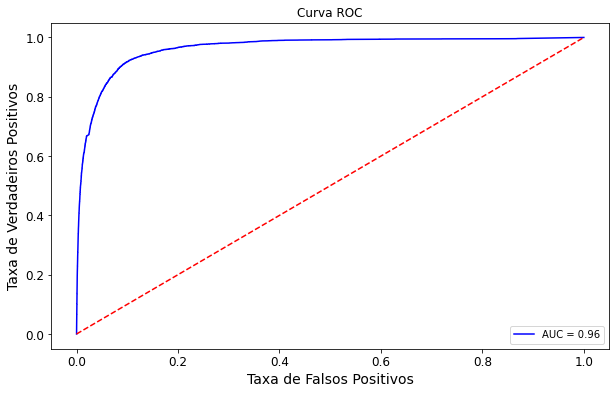

In [42]:
#--- Adaptado de: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics

probs = rfc.predict_proba(x_teste)
preds = probs[:,1]
fpr, vpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, vpr)

#--- Curva

plt.figure(figsize = [10, 6])
plt.title("Curva ROC")
plt.plot(fpr, vpr, "blue", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, color = "black")
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

# Importância das variáveis para o modelo de Random Forest

In [43]:
pd.DataFrame(rfc.feature_importances_, x_teste.columns).reset_index().rename(columns = {0: "Valor", "index": "Variável"}).sort_values("Valor", ascending = False).round(5)

,Variável,Valor
0,national_inv,0.14958
4,forecast_6_month,0.14496
21,national_inv_poly2,0.11978
3,forecast_3_month,0.09919
5,forecast_9_month,0.09499
8,sales_6_month,0.04668
13,perf_6_month_avg,0.04540
9,sales_9_month,0.04466
14,perf_12_month_avg,0.04450
7,sales_3_month,0.04208


# Próximos passos:

1. Criar novas features;
    - Relacionar a forecast_3_month com alguma variável;
2. Verificar a relação das variáveis (esqueci hoje);
3. Observar as variáveis national_inv e lead_time;
4. Testar o método de oversampling e undersampling.


Falso positivo: o modelo previu que era um pedido em atraso, quando não era 
um pedido em atraso

Falso negativo (*): o modelo disse que não era um pedido em atraso, quando na verdade ele era

- Focar na métrica Recall